### Подключение библиотек и загрузка данных

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

diabetes_df = pd.read_csv('diabetes_clean.csv')
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


In [28]:
print(diabetes_df.columns)

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')


In [29]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Удаление аномалий

In [30]:
diabetes_df = diabetes_df[diabetes_df['bmi'] > 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] > 0]
diabetes_df = diabetes_df[diabetes_df['insulin'] > 0]

### Разбивка на целевую переменную и признаки

In [31]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

### Предсказание по одной переменной (BMI)

In [32]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
print(X_bmi)

(392,) (392,)
[28.1 43.1 31.  30.5 30.1 25.8 45.8 43.3 34.6 39.3 36.6 31.1 23.2 22.2
 31.6 24.8 24.  37.1 34.  45.4 19.4 24.2 24.4 33.7 34.7 37.7 46.8 41.5
 25.4 19.6 28.9 32.9 28.6 35.1 29.3 32.4 38.5 37.1 32.  46.7 24.7 33.9
 20.4 28.7 49.7 26.6 28.7 29.5 34.3 37.4 33.3 34.  31.2 30.5 23.2 53.2
 33.6 55.  42.9 33.3 34.5 29.7 34.5 21.1 33.8 30.8 28.7 36.9 32.5 32.8
 30.5 37.4 34.3 40.6 24.6 25.2 29.  40.9 37.2 44.2 29.9 28.4 35.4 43.5
 29.7 32.7 67.1 34.9 30.1 32.  27.9 31.6 33.1 39.4 22.9 34.8 30.9 20.4
 37.7 37.5 33.2 42.6 34.2 41.8 35.8 30.  34.6 28.8 23.6 34.6 36.7 45.2
 46.2 25.4 29.7 35.9 33.1 27.1 38.2 52.3 35.4 24.4 27.6 25.9 33.3 30.9
 33.6 25.2 33.2 40.5 27.8 25.3 35.9 32.4 26.  38.7 45.6 20.8 36.1 36.9
 36.6 43.3 40.5 35.5 28.  30.7 36.6 31.6 35.8 39.7 25.5 24.8 30.5 32.9
 39.4 26.6 29.5 34.1 19.3 38.1 27.5 26.8 25.6 35.1 45.5 30.8 32.7 23.9
 47.9 34.2 25.9 25.9 38.5 28.7 21.8 27.2 33.3 35.3 36.5 31.2 34.9 34.
 27.5 32.8 38.4 35.8 34.9 36.2 39.2 25.2 37.2 43.4 30.8 25.4 25.

In [33]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
print(X_bmi)

(392, 1)
[[28.1]
 [43.1]
 [31. ]
 [30.5]
 [30.1]
 [25.8]
 [45.8]
 [43.3]
 [34.6]
 [39.3]
 [36.6]
 [31.1]
 [23.2]
 [22.2]
 [31.6]
 [24.8]
 [24. ]
 [37.1]
 [34. ]
 [45.4]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [37.7]
 [46.8]
 [41.5]
 [25.4]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [35.1]
 [29.3]
 [32.4]
 [38.5]
 [37.1]
 [32. ]
 [46.7]
 [24.7]
 [33.9]
 [20.4]
 [28.7]
 [49.7]
 [26.6]
 [28.7]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [30.5]
 [23.2]
 [53.2]
 [33.6]
 [55. ]
 [42.9]
 [33.3]
 [34.5]
 [29.7]
 [34.5]
 [21.1]
 [33.8]
 [30.8]
 [28.7]
 [36.9]
 [32.5]
 [32.8]
 [30.5]
 [37.4]
 [34.3]
 [40.6]
 [24.6]
 [25.2]
 [29. ]
 [40.9]
 [37.2]
 [44.2]
 [29.9]
 [28.4]
 [35.4]
 [43.5]
 [29.7]
 [32.7]
 [67.1]
 [34.9]
 [30.1]
 [32. ]
 [27.9]
 [31.6]
 [33.1]
 [39.4]
 [22.9]
 [34.8]
 [30.9]
 [20.4]
 [37.7]
 [37.5]
 [33.2]
 [42.6]
 [34.2]
 [41.8]
 [35.8]
 [30. ]
 [34.6]
 [28.8]
 [23.6]
 [34.6]
 [36.7]
 [45.2]
 [46.2]
 [25.4]
 [29.7]
 [35.9]
 [33.1]
 [27.1]
 [38.2]
 [52.3]
 [35.4]
 [24.4]
 [27.6]
 [25.9]

### Просмотр данных

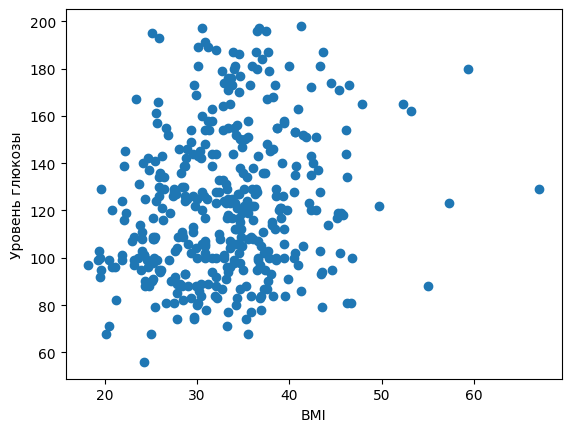

In [34]:
plt.scatter(X_bmi, y)
plt.ylabel('Уровень глюкозы')
plt.xlabel('BMI')
plt.show()

### Создание модели

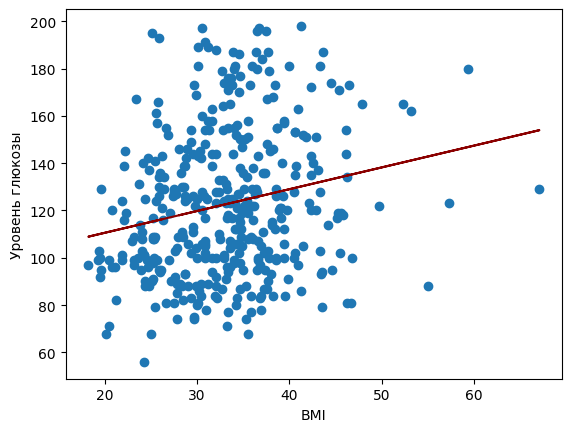

In [35]:
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color = 'darkred')
plt.ylabel('Уровень глюкозы')
plt.xlabel('BMI')
plt.show()

### Уровень глюкозы от инсулина

In [36]:
X_in = X[:, 3]
print(y.shape, X_in.shape)
print(X_in)

(392,) (392,)
[ 94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 115. 140. 110.
 245.  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 110. 142.
 128.  38. 100.  90. 140. 270.  71. 125.  71. 110. 176.  48.  64. 228.
  76.  64. 220.  40. 152. 140.  18.  36. 135. 495.  37. 175.  51. 100.
 100.  99. 135.  94. 145. 168. 225.  49. 140.  50.  92. 325.  63. 284.
 119. 204. 155. 485.  94. 135.  53. 114. 105. 285. 156.  78. 130.  48.
  55. 130. 130.  92. 495.  58. 114. 160.  94. 210.  48.  99. 318.  44.
 190. 280.  87. 130. 175. 271. 129. 120. 478. 190.  56.  32. 744.  53.
 370.  37.  45. 192.  88. 176. 194. 680. 402.  55. 258. 375. 150. 130.
  67.  56.  45.  57. 116. 278. 122. 155. 135. 545. 220.  49.  75.  40.
  74. 182. 194. 120. 360. 215. 184. 135.  42. 105. 132. 148. 180. 205.
 148.  96.  85.  94.  64. 140. 231.  29. 168. 156. 120.  68.  52.  58.
 255. 171. 105.  73. 108.  83.  74.  43. 167.  54. 249. 325. 293.  83.
  66. 140. 465.  66.  94. 158. 325.  84.  75.  72.  82. 182.  5

In [37]:
X_in = X_in.reshape(-1, 1)
print(X_in.shape)
print(X_in)

(392, 1)
[[ 94.]
 [168.]
 [ 88.]
 [543.]
 [846.]
 [175.]
 [230.]
 [ 83.]
 [ 96.]
 [235.]
 [146.]
 [115.]
 [140.]
 [110.]
 [245.]
 [ 54.]
 [192.]
 [207.]
 [ 70.]
 [240.]
 [ 82.]
 [ 36.]
 [ 23.]
 [300.]
 [342.]
 [304.]
 [110.]
 [142.]
 [128.]
 [ 38.]
 [100.]
 [ 90.]
 [140.]
 [270.]
 [ 71.]
 [125.]
 [ 71.]
 [110.]
 [176.]
 [ 48.]
 [ 64.]
 [228.]
 [ 76.]
 [ 64.]
 [220.]
 [ 40.]
 [152.]
 [140.]
 [ 18.]
 [ 36.]
 [135.]
 [495.]
 [ 37.]
 [175.]
 [ 51.]
 [100.]
 [100.]
 [ 99.]
 [135.]
 [ 94.]
 [145.]
 [168.]
 [225.]
 [ 49.]
 [140.]
 [ 50.]
 [ 92.]
 [325.]
 [ 63.]
 [284.]
 [119.]
 [204.]
 [155.]
 [485.]
 [ 94.]
 [135.]
 [ 53.]
 [114.]
 [105.]
 [285.]
 [156.]
 [ 78.]
 [130.]
 [ 48.]
 [ 55.]
 [130.]
 [130.]
 [ 92.]
 [495.]
 [ 58.]
 [114.]
 [160.]
 [ 94.]
 [210.]
 [ 48.]
 [ 99.]
 [318.]
 [ 44.]
 [190.]
 [280.]
 [ 87.]
 [130.]
 [175.]
 [271.]
 [129.]
 [120.]
 [478.]
 [190.]
 [ 56.]
 [ 32.]
 [744.]
 [ 53.]
 [370.]
 [ 37.]
 [ 45.]
 [192.]
 [ 88.]
 [176.]
 [194.]
 [680.]
 [402.]
 [ 55.]
 [258.]
 [375.]

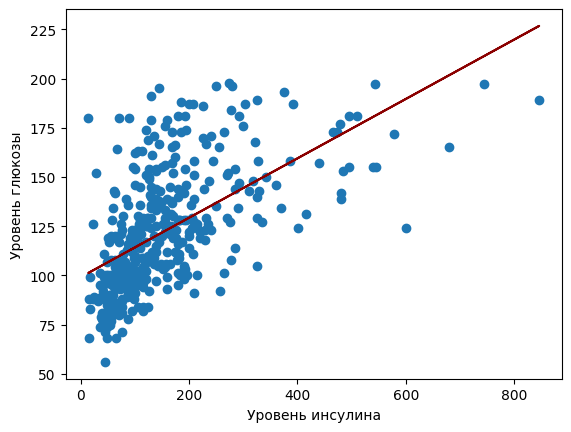

In [38]:
reg.fit(X_in, y)
predictions = reg.predict(X_in)
plt.scatter(X_in, y)
plt.plot(X_in, predictions, color = 'darkred')
plt.ylabel('Уровень глюкозы')
plt.xlabel('Уровень инсулина')
plt.show()

### Линейная модель для множества признаков

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train).coef_

array([-0.32436994,  0.11969161, -0.11593312,  0.1322153 ,  0.2235616 ,
       -1.29922569,  0.32233698, 21.70346429])

In [40]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [41]:
y_pred = reg_all.predict(X_test)

In [45]:
print(y_pred[15], y_test[15])

99.24037879604911 71


In [42]:
reg_all.score(X_test, y_test)

0.40083776514433556

### RMSE

In [46]:
root_mean_squared_error(y_test, y_pred)

22.25977250110764